In [1]:
import math
import os
import sys
import re
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

c:\users\abhis\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.getcwd()

'C:\\Users\\abhis\\Desktop\\Diveplane Task'

In [3]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'data.csv',
 'diveplanedatascientistposition.zip',
 'Diverplane.ipynb',
 'Problem_Statement.docx',
 'Untitled.ipynb',
 '~$oblem_Statement.docx']

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head(50)

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0
5,6vFQfkVIyHglLHjv,2015-06,14.0,1753.0,2.0,3603.0,NaN,NaN
6,1wyQjXUjUljiLEyP,2015-04,1.0,1500.0,5.0,72156.0,1.0,461.0
7,1wyQjXUjUljiLEyP,2015-05,1.0,8.0,8.0,5089.0,1.0,37.0
8,1wyQjXUjUljiLEyP,2015-06,NaN,NaN,5.0,40938.0,NaN,NaN
9,1wyQjXUjUljiLEyP,2015-07,7.0,151.0,3.0,292.0,2.0,24.0


In [6]:
print("Adderall Patients Maximum Value:", df['AdderallPatients'].max(skipna = True))
print("Adderall Patients Minimum Value:", df['AdderallPatients'].min(skipna = True))
print("Adderall Payments Maximum Value:", df['AdderallPayments'].max(skipna = True))
print("Adderall Payments Minimum Value:", df['AdderallPayments'].min(skipna = True))

Adderall Patients Maximum Value: 341.0
Adderall Patients Minimum Value: 1.0
Adderall Payments Maximum Value: 1732264.0
Adderall Payments Minimum Value: -11771.0


In [7]:
print("Antibio Patients Maximum Value:", df['AntibioPatients'].max(skipna = True))
print("Antibio Patients Minimum Value:", df['AntibioPatients'].min(skipna = True))
print("Antibio Payments Maximum Value:", df['AntibioPayments'].max(skipna = True))
print("Antibio Payments Minimum Value:", df['AntibioPayments'].min(skipna = True))

Antibio Patients Maximum Value: 285.0
Antibio Patients Minimum Value: 1.0
Antibio Payments Maximum Value: 2423404.0
Antibio Payments Minimum Value: -9400.0


In [8]:
print("Opioid Patients Maximum Value:", df['OpioidPatients'].max(skipna = True))
print("Opioid Patients Minimum Value:", df['OpioidPatients'].min(skipna = True))
print("Opioid Payments Maximum Value:", df['OpioidPayments'].max(skipna = True))
print("Opioid Payments Minimum Value:", df['OpioidPayments'].min(skipna = True))

Opioid Patients Maximum Value: 318.0
Opioid Patients Minimum Value: 0.0
Opioid Payments Maximum Value: 2823021.0
Opioid Payments Minimum Value: -10.0


In [9]:
len(df.ID.unique())

3010

In [10]:
len(df)

42074

In [11]:
df.ID.unique()

array(['6vFQfkVIyHglLHjv', '1wyQjXUjUljiLEyP', 'y71QQKRICtTBXoGG', ...,
       'h72fi2iG9YIiyGta', 'ApPpPpPvWUqHMxP5', '6d6ujOAwj6TKEbrN'],
      dtype=object)

In [12]:
df.groupby('ID').idxmax()

,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments
ID,,,,,,
00uSjJiSgBOBO3XX,NaN,NaN,681.0,681.0,680.0,680.0
02apJGe9GtE4LfxZ,19648.0,19662.0,19639.0,19653.0,19663.0,19646.0
06oajfabd6FZ5cDn,14577.0,14561.0,14570.0,14573.0,14572.0,14583.0
08LqeNKEAgkxALX6,377.0,377.0,377.0,377.0,377.0,377.0
09IWkEKKORhZAFkc,30034.0,30028.0,30029.0,30029.0,30036.0,30046.0
0AlYY1WhJ6e4xcCd,32168.0,32169.0,32181.0,32182.0,32174.0,32179.0
0AnEn67D4RmPX1Aj,25179.0,25188.0,25201.0,25201.0,25173.0,25172.0
0AyZrwgCKZkyg0Bf,16925.0,16925.0,16926.0,16922.0,16919.0,16919.0
0BD7oV92Wy2v4tZP,32293.0,32293.0,32293.0,32293.0,NaN,NaN


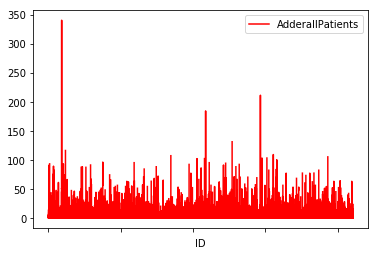

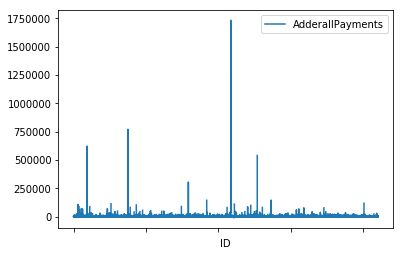

42074


In [17]:
df.plot(x="ID", y = "AdderallPatients", color = "red")
df.plot(x="ID", y = "AdderallPayments")

plt.show()
print(len(df))

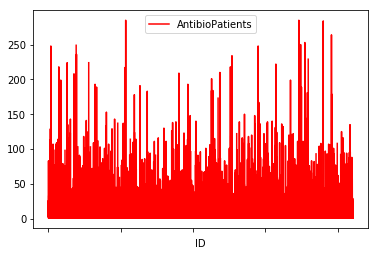

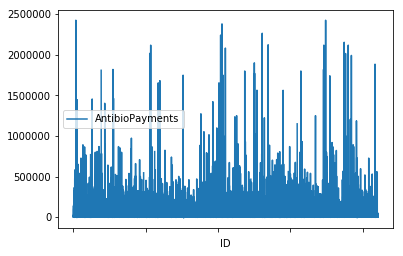

In [18]:
df.plot(x="ID", y = "AntibioPatients", color = "red")
df.plot(x="ID", y = "AntibioPayments")

plt.show()

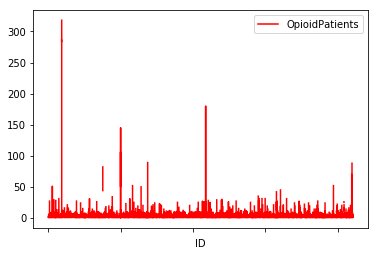

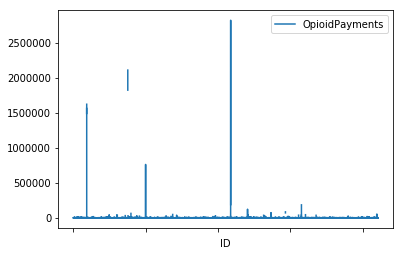

In [19]:
df.plot(x="ID", y = "OpioidPatients", color = "red")
df.plot(x="ID", y = "OpioidPayments")
plt.show()

In [20]:
df["Adderall"] = df["AdderallPayments"]/df["AdderallPatients"]
df.head()

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments,Adderall
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0,NaN
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN,114.0
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN,NaN
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN,120.0
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0,NaN


In [21]:
df.insert(9, "Antibio", 0)
df["Antibio"] = df["AntibioPayments"]/df["AntibioPatients"]
df.head()

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments,Adderall,Antibio
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0,NaN,609.750000
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN,114.0,5.000000
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN,NaN,1599.000000
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN,120.0,4.500000
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0,NaN,652.423077


In [39]:
#df.insert(10, "Opioid", 0)
df["Opioid"] = df["OpioidPayments"]/df["OpioidPatients"]
df.head(20)

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments,Adderall,Antibio,Opioid
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0,NaN,609.750000,1.0
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN,114.000000,5.000000,NaN
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN,NaN,1599.000000,NaN
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN,120.000000,4.500000,NaN
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0,NaN,652.423077,2.0
5,6vFQfkVIyHglLHjv,2015-06,14.0,1753.0,2.0,3603.0,NaN,NaN,125.214286,1801.500000,NaN
6,1wyQjXUjUljiLEyP,2015-04,1.0,1500.0,5.0,72156.0,1.0,461.0,1500.000000,14431.200000,461.0
7,1wyQjXUjUljiLEyP,2015-05,1.0,8.0,8.0,5089.0,1.0,37.0,8.000000,636.125000,37.0
8,1wyQjXUjUljiLEyP,2015-06,NaN,NaN,5.0,40938.0,NaN,NaN,NaN,8187.600000,NaN
9,1wyQjXUjUljiLEyP,2015-07,7.0,151.0,3.0,292.0,2.0,24.0,21.571429,97.333333,12.0


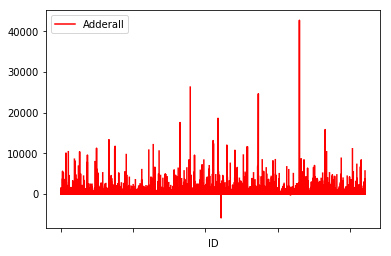

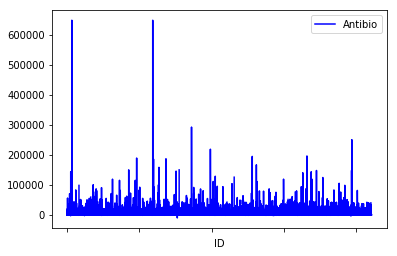

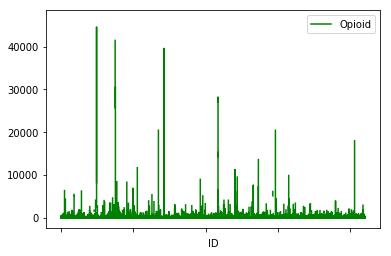

In [23]:
df.plot(x="ID", y = "Adderall", color = "red")
df.plot(x="ID", y = "Antibio", color = "blue")
df.plot(x="ID", y = "Opioid", color = "green")
plt.show()

In [37]:
df.Opioid.mean()

inf

In [24]:
df["Adderall"].mean() 

259.6832728167205

701


1066.8290851199306

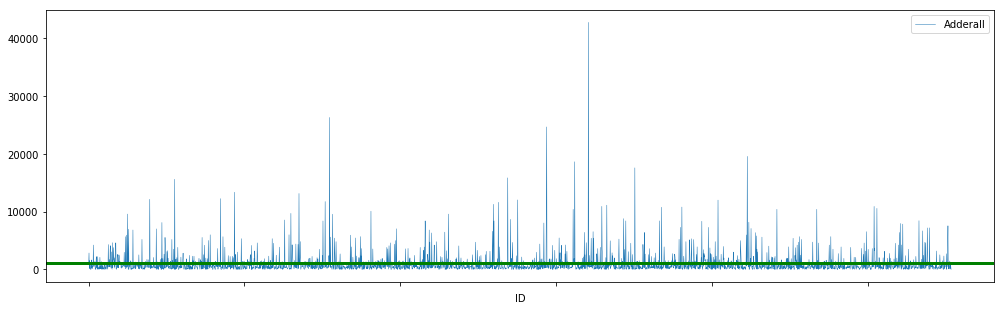

In [25]:
%matplotlib inline
df2 = df[['ID' ,'Adderall']].dropna().groupby(['ID']).max()
print(len(df2[df2.Adderall > df2.mean()[0]]))
df2.plot(linewidth = 0.5, figsize = (17, 5))
#plt.axhline(df2["Adderall"].quantile(0.9), color="green")
plt.axhline(df2["Adderall"].mean(), color="green", linewidth = 3)
df2['Adderall'].mean()

960


15254.022069639846

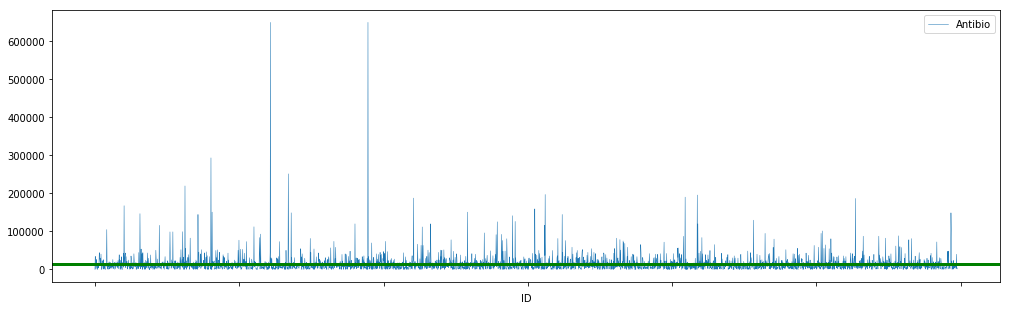

In [29]:
%matplotlib inline
df2 = df[['ID' ,'Antibio']].dropna().groupby(['ID']).max()
print(len(df2[df2.Antibio > df2.mean()[0]]))
df2.plot(linewidth = 0.5, figsize = (17, 5))
#plt.axhline(df2["Adderall"].quantile(0.9), color="green")
plt.axhline(df2["Antibio"].mean(), color="green", linewidth = 3)
df2['Antibio'].mean()

0


inf

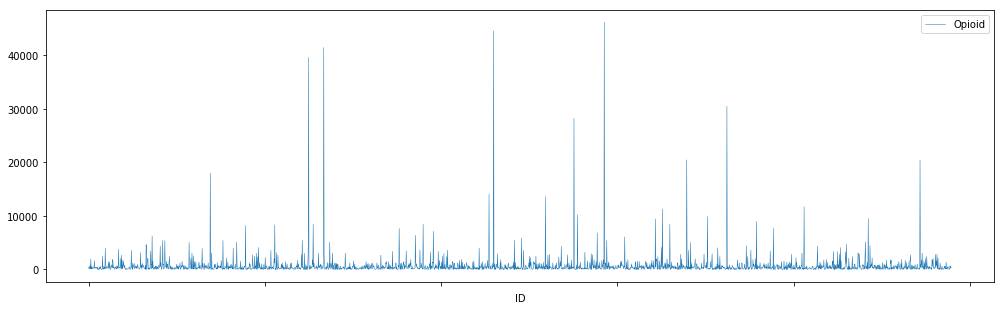

In [31]:
%matplotlib inline
df2 = df[['ID' ,'Opioid']].dropna().groupby(['ID']).max()
print(len(df2[df2.Opioid > df2.mean()[0]]))
df2.plot(linewidth = 0.5, figsize = (17, 5))
#plt.axhline(df2["Adderall"].quantile(0.9), color="green")
plt.axhline(df2["Opioid"].mean(), color="green", linewidth = 9)
df2['Opioid'].mean()

In [59]:
%matplotlib inline
df2 = df[['ID' ,'Adderall']].dropna().groupby(['ID']).max()
#print (type(df2.mean()[0]))
#df2[df2.Opioid > df2.mean()[0]]
#df2.matplotlib.pyplot.hlines(df2.mean(), colors='k', linestyles='solid', label='', hold=None, data=None, **kwargs)
#df2.plot()
#plt.axhline(df["Opioid"].mean(), color="green")
df3 = df2 - df[['ID' ,'Adderall']].dropna().groupby(['ID']).min()

df3.head(5)


,Adderall
ID,
02apJGe9GtE4LfxZ,963.000000
06oajfabd6FZ5cDn,2849.666667
08LqeNKEAgkxALX6,0.000000
09IWkEKKORhZAFkc,1518.500000
0AlYY1WhJ6e4xcCd,887.000000


In [49]:
%matplotlib inline
df2 = df[['ID' ,'Antibio']].dropna().groupby(['ID']).max()
#print (type(df2.mean()[0]))
#df2[df2.Opioid > df2.mean()[0]]
#df2.matplotlib.pyplot.hlines(df2.mean(), colors='k', linestyles='solid', label='', hold=None, data=None, **kwargs)
#df2.plot()
#plt.axhline(df["Opioid"].mean(), color="green")
df4 = df2 - df[['ID' ,'Antibio']].dropna().groupby(['ID']).min()
df4.head(5)


,Antibio
ID,
00uSjJiSgBOBO3XX,0.000000
02apJGe9GtE4LfxZ,34451.000000
06oajfabd6FZ5cDn,27279.571429
08LqeNKEAgkxALX6,0.000000
09IWkEKKORhZAFkc,7157.714286


In [50]:
%matplotlib inline
df2 = df[['ID' ,'Opioid']].dropna().groupby(['ID']).max()
#print (type(df2.mean()[0]))
#df2[df2.Opioid > df2.mean()[0]]
#df2.matplotlib.pyplot.hlines(df2.mean(), colors='k', linestyles='solid', label='', hold=None, data=None, **kwargs)
#df2.plot()
#plt.axhline(df["Opioid"].mean(), color="green")
df5 = df2 - df[['ID' ,'Opioid']].dropna().groupby(['ID']).min()
df5.head(5)


,Opioid
ID,
00uSjJiSgBOBO3XX,0.000000
02apJGe9GtE4LfxZ,519.000000
06oajfabd6FZ5cDn,258.666667
08LqeNKEAgkxALX6,0.000000
09IWkEKKORhZAFkc,729.333333


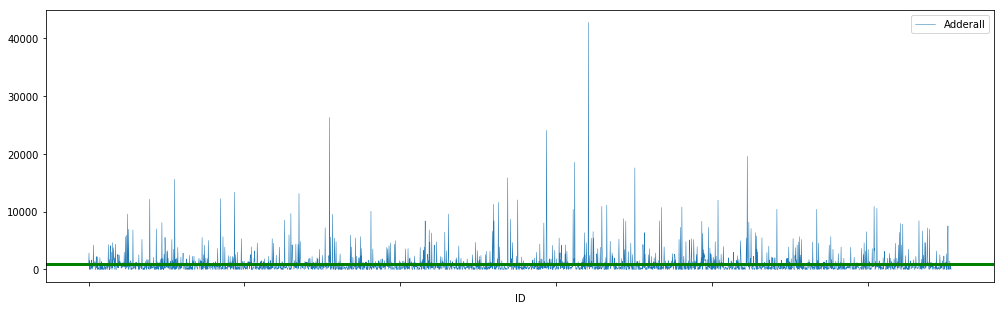

In [60]:
%matplotlib inline
df3.plot(linewidth = 0.5, figsize = (17, 5))
#plt.axhline(df2["Adderall"].quantile(0.9), color="green")
plt.axhline(df3["Adderall"].mean(), color="green", linewidth = 3)